## Estadística Aplicada

Sesión 9_10 
12 y 14 septiembre

Francisco Javier Chavez Hernandez

Gpo 044

In [ ]:
# seguir 3 pasos
# 1 importar librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install lifelines

In [ ]:
from lifelines import KaplanMeierFitter, ExponentialFitter, CoxPHFitter, WeibullAFTFitter, LogNormalAFTFitter
import seaborn as sns

In [ ]:
## 2 datos
df_cancer = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/cancer.csv')

In [ ]:
df_cancer.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


Los datos constan de 228 observaciones y 10 variables/columnas. La descripción de las variables es la siguiente:
inst: código de institución\
**time (d1)**: tiempo de supervivencia en días\
**status (d2)**: estado de censura 1 = censurado, 2 = muerto\
**age (i1)**: Edad en años\
**sex (i2)**: Masculino = 1 Femenino = 2\
**ph.ecog (i3)**: puntuación de rendimiento ECOG según la calificación del médico. 0 = asintomático, 1 = sintomático pero completamente ambulatorio, 2 = en cama <50% del día, 3 = en cama > 50% del día pero no encamado, 4 = encamado\
**ph.karno (i4)**: puntuación de desempeño de Karnofsky (mala = 0; buena = 100) calificada por el médico\
**pat.karno (i4)**: puntuación de rendimiento de Karnofsky según la calificación del paciente\
**meal.cal (i5)**: Calorías consumidas en las comidas\
**wt.loss (i6)**: Pérdida de peso en los últimos seis meses.

In [ ]:
# 3 Estadísticas descriptivas .. ajustes de datos
df_cancer['status'] = df_cancer['status']-1
df_cancer['sex'] = df_cancer['sex']-1
#status censurado=0, muerto=1
#sex hombre=0, mujer=1

In [ ]:
df_cancer.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,306,1,74,0,1.0,90.0,100.0,1175.0,NaN
1,455,1,68,0,0.0,90.0,90.0,1225.0,15.0
2,1010,0,56,0,0.0,90.0,90.0,NaN,15.0
3,210,1,57,0,1.0,90.0,60.0,1150.0,11.0
4,883,1,60,0,0.0,100.0,90.0,NaN,0.0


In [ ]:
from autograd.extend import def_linear
#eliminar variable inst
df_cancer = df_cancer.drop('inst',axis=1)

In [ ]:
# verificar que sean numericas para poder utilizarlas
df_cancer.dtypes
# int enteros
#float decimales

time           int64
status         int64
age            int64
sex            int64
ph.ecog        int64
ph.karno     float64
pat.karno    float64
meal.cal     float64
wt.loss      float64
dtype: object

In [ ]:
#verificar cuantos missing values (valores perdidos)
df_cancer.isnull().sum()

time         0
status       0
age          0
sex          0
ph.ecog      0
ph.karno     0
pat.karno    0
meal.cal     0
wt.loss      0
dtype: int64

In [ ]:
#eliminar los datos, si la muestra es muy pequeña
# impuntuar (asignar) datos los valores perdidos
df_cancer['ph.karno']=df_cancer['ph.karno'].fillna(df_cancer['ph.karno'].mean())
df_cancer['pat.karno']=df_cancer['pat.karno'].fillna(df_cancer['pat.karno'].mean())
df_cancer['meal.cal']=df_cancer['meal.cal'].fillna(df_cancer['meal.cal'].mean())
media_loss = df_cancer['wt.loss'].mean()
df_cancer['wt.loss']=df_cancer['wt.loss'].fillna(media_loss)

In [ ]:
df_cancer.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,306,1,74,0,1.0,90.0,100.0,1175.000000,9.831776
1,455,1,68,0,0.0,90.0,90.0,1225.000000,15.000000
2,1010,0,56,0,0.0,90.0,90.0,928.779006,15.000000
3,210,1,57,0,1.0,90.0,60.0,1150.000000,11.000000
4,883,1,60,0,0.0,100.0,90.0,928.779006,0.000000


In [ ]:
df_cancer.count()

time         227
status       227
age          227
sex          227
ph.ecog      227
ph.karno     227
pat.karno    227
meal.cal     227
wt.loss      227
dtype: int64

In [ ]:
# eliminar los que tienen valores pérdidos
df_cancer=df_cancer.dropna()

In [ ]:
##lifelines tenemos que convertir en dummys las variables categóricas
df_cancer['ph.ecog']=df_cancer['ph.ecog'].astype('int64')

<ipython-input-21-dfe624160a38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancer['ph.ecog']=df_cancer['ph.ecog'].astype('int64')


In [ ]:
#convertir en dummys
dummies=pd.get_dummies(df_cancer['ph.ecog'],prefix='ecog').astype(int)
dummies.head()

,ecog_0,ecog_1,ecog_2,ecog_3
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


In [ ]:
dummies = dummies[['ecog_1','ecog_2']]
df_cancer = pd.concat([df_cancer,dummies],axis=1)
df_cancer = df_cancer.drop('ph.ecog',axis=1)

In [ ]:
#estadisticas descriptivas
df_cancer.describe()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,305.232456,0.723684,62.447368,0.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,5.000000,0.000000,39.000000,0.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,166.750000,0.000000,56.000000,0.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,255.500000,1.000000,63.000000,0.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,396.500000,1.000000,69.000000,1.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,1022.000000,1.000000,82.000000,1.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


El 72% de los individuos fallecerion, el 39% es mujer, la edad promedio es de 63.44 años, el individuo más joven tiene 39 y el de más edad tiene 82

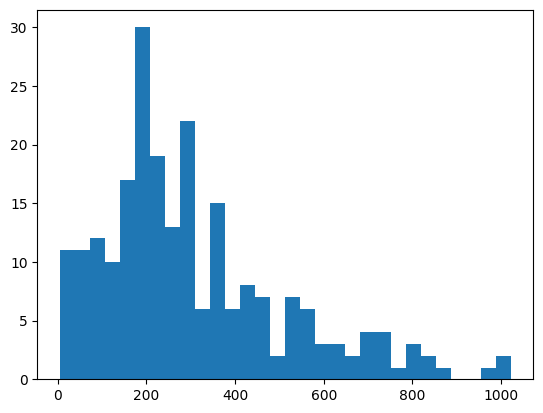

In [ ]:
## distribución T
plt.hist(df_cancer['time'],bins=30)
plt.show()

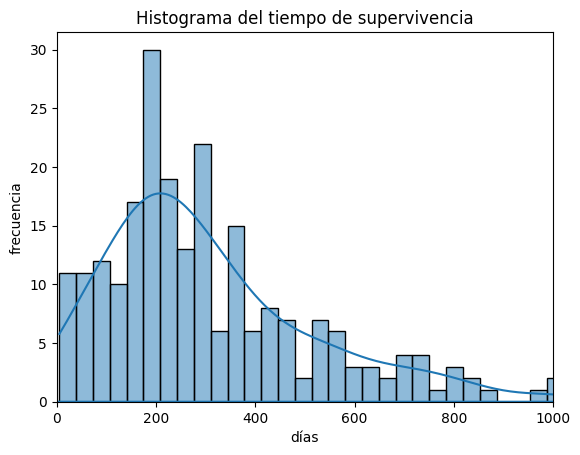

In [ ]:
#histograma
sns.histplot(df_cancer['time'],bins=30,kde=True)
#añadir curva para ver a que distribución se parece
sns.kdeplot(df_cancer['time'])
plt.xlim(0,1000)
plt.title('Histograma del tiempo de supervivencia')
plt.xlabel('días')
plt.ylabel('frecuencia');

Notar que al listar la base de datos siempre es la parte más complicada del análisis de datos

In [ ]:
##  Estimación del modelo
cph1 = CoxPHFitter().fit(df_cancer,'time','status')
cph1.print_summary()
#si no sale pip install jinja2

<lifelines.CoxPHFitter: fitted with 227 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 227
number of events observed = 164
   partial log-likelihood = -726.94
         time fit was run = 2023-09-14 16:57:14 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.58       0.56       0.17            -0.92            -0.25                 0.40                 0.78
ph.karno    0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00
ecog_1      0.56       1.74       0.24             0.09             1.02                 1.10                 2.77
ecog_2      1.08       2.94       0.37             0.35             1.80                 1.43                 6.08

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  1.37   0.17       2.54
sex           0.00 -3.41 <0.005      10.59
ph.karno      0.00  1.37   0.17       2.56
pat.karno     0.00 -1.82   0.07       3.87
meal.cal      0.00  0.11   0.92       0.13
wt.loss       0.00 -1.65   0.10       3.35
ecog_1        0.00  2.35   0.02       5.74
ecog_2        0.00  2.92 <0.005       8.15
---
Concordance = 0.65
Partial AIC = 1469.88
log-likelihood ratio test = 35.08 on 8 df
-log2(p) of ll-ratio test = 15.24

## Interpretación

**age** su pvalue = .17 es menor a alfa = .05, No Rechazamos H0/*No estadísticamente significativo*, significa que Age no tiene efecto sobre el riesgo de morir de cancer.

**sex** Rechazamos H0/*estadísticamente significativo*, Ser mujer disminuye el riesgo de morir de cancer en 44% en comparación con los hombres.

**ph.karno, pat.karno, meal.cal, wt.loss** No rechazamos H0/*No estadísticamente significativo*, las variables no tienen efecto sobre el riesgo de morir de cancer.

**ecog_1=ambulatorio** Rechazamos H0/*estadísticamente significativo*, significa que los ambulatorios tienen mayor riesgo de morir de cancer. Tienen 74% riesgo de morir de cáncer que en comparación de los asintomáticos de cáncer.

**ecog_2=cama>50%** Rechazamos H0/*estadísticamente significativo*, significa que los que estan en cama tienen mayo riesgo de morir de cáncer. Tienen 194% más riesgo de morir en comparación con un asintomático.


In [ ]:
1-.56


0.43999999999999995

In [ ]:
## Nueva base de datos
from lifelines.datasets import load_rossi
rossi = load_rossi()
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [ ]:
#verificar que sean númericas
rossi.dtypes

week      int64
arrest    int64
fin       int64
age       int64
race      int64
wexp      int64
mar       int64
paro      int64
prio      int64
dtype: object

In [ ]:
## verificar que no haya valores perdidos
rossi.isnull().sum()

week      0
arrest    0
fin       0
age       0
race      0
wexp      0
mar       0
paro      0
prio      0
dtype: int64

In [ ]:
#estadísticas descriptivas
rossi.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,432.000000,432.000000,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,45.854167,0.263889,0.50000,24.597222,0.877315,0.571759,0.122685,0.618056,2.983796
std,12.662293,0.441251,0.50058,6.113375,0.328456,0.495398,0.328456,0.486426,2.896068
min,1.000000,0.000000,0.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.00000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,52.000000,0.000000,0.50000,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,52.000000,1.000000,1.00000,27.000000,1.000000,1.000000,0.000000,1.000000,4.000000
max,52.000000,1.000000,1.00000,44.000000,1.000000,1.000000,1.000000,1.000000,18.000000


Esta base es de Estados Unidos en los 80's

arrest 1 = volvió a ser arrestado, 0=censurado
week = semanas que tardo en volve a ser arrestado

In [ ]:
# vamos a estimar un modelo de cox
cph2 = CoxPHFitter().fit(rossi,'week','arrest')
cph2.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-09-14 18:01:11 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

## Interpretación

**fin** No Rechazamos H0, significa que darles dinero cuando los liberan no tiene efecto sobre el riesgo de volver a ser arrestado.

**age** Rechazamos H0, significa que la edad disminuye el riesgo de volver a ser arrestado. Con cada año que se cumple el riesgo de volver a ser arrestado disminuye en 6%.

**race** No Rechazamos H0, ser negro no afecta el riesgo de volver a ser arrestado en comparación de los que no son negros.

**wexp, mar, paro** No Rechazamos H0, estar casado y estar desempleado cuando te arrestaron no tiene efecto sobre el riesgo de volver a ser arrestado.

**prio** Rechazamos H0, que el haber estado varias veces antes en la cárcel incrementa el riesgo de volver a ser arrestado. Por cada vez que estuvo en la cárcel afecta el riesgo de volver a ser arrestado el 10%.

El modelo de Cox se basa en el supuesto de que el riesgo es constante en el tiempo, le llamamos riesgo proporcional constante.

In [ ]:
cph2.check_assumptions(rossi,p_value_threshold=0.05)
#H0: se viola el supuesto, Ha: no se viola el supuesto

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
         test_name = proportional_hazard_test

---
           test_statistic      p  -log2(p)
age  km             11.03 <0.005     10.12
     rank           11.45 <0.005     10.45
fin  km              0.02   0.89      0.17
     rank            0.02   0.90      0.15
mar  km              0.60   0.44      1.19
     rank            0.71   0.40      1.32
paro km              0.12   0.73      0.45
     rank            0.13   0.71      0.49
prio km              0.02   0.88      0.18
     rank            0.02   0.89      0.17
race km              1.44   0.23      2.12
     rank            1.43   0.23      2.11
wexp km              7.48   0.01      7.32
     rank            7.31   0.01      7.19



1. Variable 'age' failed the non-proportional test: p-value is 0.0007.

   Advice 1: the functional form of the variable 'age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'age' using pd.cut, and then specify it in `strata=['age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'wexp' failed the non-proportional test: p-value is 0.0063.

   Advice: with so few unique values (only 2), you can include `strata=['wexp', ...]` in the call in
`.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/lat

[]

In [ ]:
##alternativas
#eliminar variables o recodificarlas
##Estimar otro modelo AFT (modelo de riesgo acelerado)


In [ ]:
#verificar los supuestos
cph1 = CoxPHFitter().fit(df_cancer,'time','status')
cph2.check_assumptions(rossi,p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
         test_name = proportional_hazard_test

---
           test_statistic      p  -log2(p)
age  km             11.03 <0.005     10.12
     rank           11.45 <0.005     10.45
fin  km              0.02   0.89      0.17
     rank            0.02   0.90      0.15
mar  km              0.60   0.44      1.19
     rank            0.71   0.40      1.32
paro km              0.12   0.73      0.45
     rank            0.13   0.71      0.49
prio km              0.02   0.88      0.18
     rank            0.02   0.89      0.17
race km              1.44   0.23      2.12
     rank            1.43   0.23      2.11
wexp km              7.48   0.01      7.32
     rank            7.31   0.01      7.19



1. Variable 'age' failed the non-proportional test: p-value is 0.0007.

   Advice 1: the functional form of the variable 'age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'age' using pd.cut, and then specify it in `strata=['age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'wexp' failed the non-proportional test: p-value is 0.0063.

   Advice: with so few unique values (only 2), you can include `strata=['wexp', ...]` in the call in
`.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/lat

[]

ph.karno, meal.cal violan el supuesto de riesgo proporcional constante

In [ ]:
from lifelines.fitters.log_normal_fitter import LogNormalFitter
from lifelines.fitters.weibull_fitter import WeibullFitter
# vamos a eleggir el modelo AFT
# primero tenemos que determinar si es exponencial, Weibul o Log - normal
mexpo=ExponentialFitter().fit(rossi['week'],rossi['arrest'])
mweibull=WeibullFitter().fit(rossi['week'],rossi['arrest'])
mlogn=LogNormalFitter().fit(rossi['week'],rossi['arrest'])

In [ ]:
mexpo.AIC_.round(), mweibull.AIC_.round(), mlogn.AIC_.round()

(1406.0, 1397.0, 1400.0)

Vamos a estimar un AFT weibull

In [ ]:
from lifelines import WeibullAFTFitter

In [ ]:
weibullAFT1 = WeibullAFTFitter().fit(rossi, 'week', 'arrest')
weibullAFT1.print_summary()

<lifelines.WeibullAFTFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
   number of observations = 432
number of events observed = 114
           log-likelihood = -679.92
         time fit was run = 2023-09-14 18:30:04 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ age         0.04       1.04       0.02             0.01             0.07                 1.01                 1.07
        fin         0.27       1.31       0.14             0.00             0.54                 1.00                 1.72
        mar         0.31       1.37       0.27            -0.22             0.85                 0.80                 2.33
        paro        0.06       1.06       0.14            -0.21             0.33                 0.81                 1.39
        prio       -0.07       0.94       0.02            -0.11            -0.02                 0.90                 0.98
        race       -0.22       0.80       0.22            -0.66             0.21                 0.52                 1.23
        wexp        0.11       1.11       0.15            -0.19             0.40                 0.83                 1.50
        Intercept   3.99      54.06       0.42             3.17             4.81                23.78               122.92
rho_    Intercept   0.34       1.40       0.09             0.16             0.51                 1.18                 1.67

                    cmp to     z      p   -log2(p)
param   covariate                                 
lambda_ age           0.00  2.54   0.01       6.51
        fin           0.00  1.97   0.05       4.37
        mar           0.00  1.14   0.25       1.97
        paro          0.00  0.42   0.67       0.57
        prio          0.00 -3.14 <0.005       9.22
        race          0.00 -1.02   0.31       1.70
        wexp          0.00  0.70   0.48       1.05
        Intercept     0.00  9.52 <0.005      68.98
rho_    Intercept     0.00  3.81 <0.005      12.81
---
Concordance = 0.64
AIC = 1377.83
log-likelihood ratio test = 33.42 on 7 df
-log2(p) of ll-ratio test = 15.46

In [ ]:
# AFT el efecto es sobre la media del tiempo de supervivencia

**age** Rechazamos H0. La edad incrementa el tiempo en que tardas en volver a ser arrestado, por cada año de edad la media del tiempo de  volver a ser arrestado se incrementa en 4%.

**fin, mar, paro, race, wexp** No Rechazamos, no tienen efecto sobre la media del tiempo de volver a ser arrestado.

**prio** Rechazamos H0, El ser arrestado antes disminuye la media del tiempo de volver a ser arrestado (el evento pasa más rápido), por cada vez que ha sido arrestado disminuye la media del tiempo de 6%.

Esto es si alguna variable violo el supuesto
